In [46]:
import json
import re
import numpy as np

In [47]:
def generate_pairwise(start_index, num_cards, decks):
    """
    Generates pairwise counts of cards appearing in decks together
    inputs: start_index is used to generate indexes for cards, assumes card ID's ascend incrementally
    
    """
    array = np.zeros((num_cards, num_cards))
    for deck in decks:
        ids = list(deck.keys())
        for i in range(len(ids)):
            id1 = int(ids[i])-start_index
            for j in range(i+1, len(ids)):
                id2 = int(ids[j])-start_index
                # use ratios 
                array[id1,id2] += deck[ids[j]]/deck[ids[i]]
                array[id2,id1] += deck[ids[i]]/deck[ids[j]]
    print('done')
    return array
                
            

In [49]:
card_dict = {} # map card ID to card name (may be unnecessary)
card_map = [] # index to card ID for nparray 
start_index = 0 # ID of first card - follows convention of TOP8Draft values
with open('M19_M19_M19_cards.txt') as f:
    for line in f:
        split = line.split(';')
        
        card_id = int(split[1].rstrip())
        card_name = split[0]
        
        card_dict[card_id] = card_name
        card_map.append(card_id)
        
    start_index = card_map[0]
# print(card_dict)
        
with open('consolidated_decks.json') as g:
    j = json.load(g)
    decks = j['decks']
    synergies = generate_pairwise(start_index, len(card_map), decks)
    print(synergies)

done
[[   0.         1796.5         460.         ...  860.33333333
   838.          861.5       ]
 [1704.58333333    0.          489.66666667 ...  885.66666667
   856.25        872.        ]
 [ 496.          556.            0.         ...  242.5
   249.          228.        ]
 ...
 [ 887.          956.83333333  241.         ...    0.
   481.          498.5       ]
 [ 890.5         956.5         247.5        ...  473.83333333
     0.          462.33333333]
 [ 889.          928.          222.         ...  491.
   463.83333333    0.        ]]


In [50]:
print(synergies)

[[   0.         1796.5         460.         ...  860.33333333
   838.          861.5       ]
 [1704.58333333    0.          489.66666667 ...  885.66666667
   856.25        872.        ]
 [ 496.          556.            0.         ...  242.5
   249.          228.        ]
 ...
 [ 887.          956.83333333  241.         ...    0.
   481.          498.5       ]
 [ 890.5         956.5         247.5        ...  473.83333333
     0.          462.33333333]
 [ 889.          928.          222.         ...  491.
   463.83333333    0.        ]]


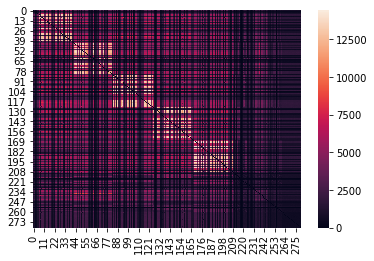

In [55]:
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline  
ax = sns.heatmap(synergies)
plt.show()